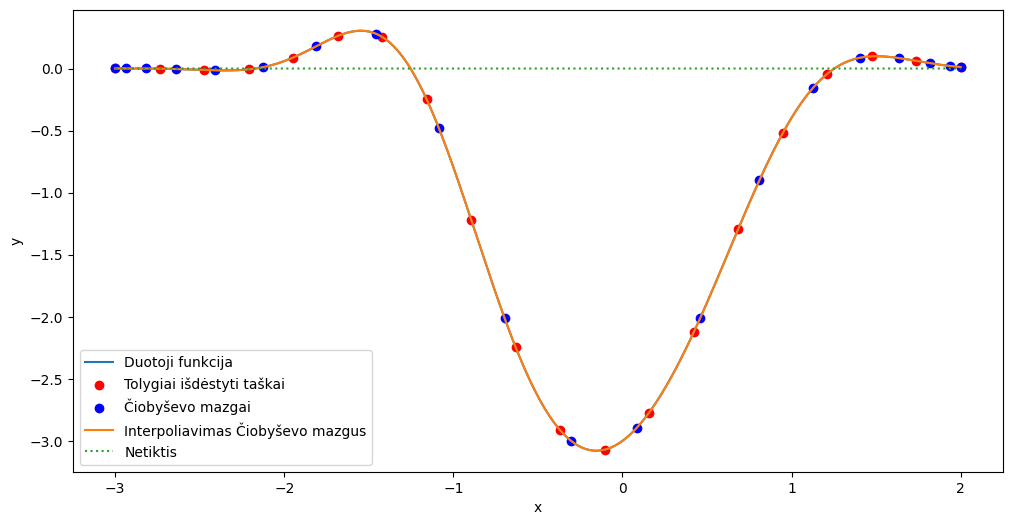

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given analytical function
def f(x):
    return np.exp(-x**2) * np.cos(x**2) * (x - 3)

# Function to calculate interpolating polynomial using Chebyshev nodes
def interpolate_chebyshev_nodes(x_values, y_values, x):
    result = 0
    for i in range(len(x_values)):
        term = y_values[i]
        for j in range(len(x_values)):
            if j != i:
                term = term * (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

# Generate evenly spaced points and Chebyshev nodes
num_points = 20 # You can adjust this value
evenly_spaced_x = np.linspace(-3, 2, num_points)
chebyshev_nodes_x = np.cos((2 * np.arange(1, num_points + 1) - 1) * np.pi / (2 * num_points))
chebyshev_nodes_x = np.interp(chebyshev_nodes_x, (chebyshev_nodes_x.min(), chebyshev_nodes_x.max()), (-3, 2))

# Calculate y values for the given analytical function
evenly_spaced_y = f(evenly_spaced_x)
chebyshev_nodes_y = f(chebyshev_nodes_x)

# Generate x values for plotting
x_values_for_plotting = np.linspace(-3, 2, 1000)

# Calculate y values for the analytical function
analytical_function_y = f(x_values_for_plotting)

# Calculate y values for interpolation using Chebyshev nodes
interpolation_chebyshev_nodes = [interpolate_chebyshev_nodes(chebyshev_nodes_x, chebyshev_nodes_y, x) for x in x_values_for_plotting]

# Calculate the difference (netiktis) between the analytical function and interpolation
difference = analytical_function_y - interpolation_chebyshev_nodes

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the given analytical function
plt.plot(x_values_for_plotting, analytical_function_y, label='Duotoji funkcija')

# Plot evenly spaced points
plt.scatter(evenly_spaced_x, evenly_spaced_y, color='red', marker='o', label='Tolygiai išdėstyti taškai')

# Plot Chebyshev nodes
plt.scatter(chebyshev_nodes_x, chebyshev_nodes_y, color='blue', marker='o', label='Čiobyševo mazgai')

# Plot the interpolation using Chebyshev nodes
plt.plot(x_values_for_plotting, interpolation_chebyshev_nodes, label='Interpoliavimas Čiobyševo mazgus')

# Plot the difference (netiktis) with a dotted line
plt.plot(x_values_for_plotting, difference, linestyle='dotted', label='Netiktis')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()
